# Digit Recognizer

Link: https://www.kaggle.com/competitions/digit-recognizer

## Importing necessary libraries

In [303]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Dataset

In [304]:
train_df = pd.read_csv('train.csv', index_col=False)
test_df = pd.read_csv('test.csv', index_col=False)

In [305]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
target_features = train_df['label']
target_features

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [308]:
input_features = train_df.drop('label', axis=1)
input_features = input_features/255 # normalization of pixels
input_features

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
input_dim = input_features.shape
print(input_dim)

(42000, 784)


Checking total label classes

In [310]:
one_hot_encoding = pd.get_dummies(train_df['label'])
one_hot_encoding

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


## Creating Model

In [311]:
deep_learning = tf.keras.Sequential([
      tf.keras.layers.Dense(units=128, activation = tf.nn.relu, input_shape=(None, input_dim[1])),
      tf.keras.layers.Dropout(0.15),
      tf.keras.layers.Dense(units = 128, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.15),
      tf.keras.layers.Dense(units=10, activation =tf.nn.softmax),
])

In [312]:
deep_learning.build()
deep_learning.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.01), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
deep_learning.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, None, 128)         100480    
                                                                 
 dropout_13 (Dropout)        (None, None, 128)         0         
                                                                 
 dense_89 (Dense)            (None, None, 128)         16512     
                                                                 
 dropout_14 (Dropout)        (None, None, 128)         0         
                                                                 
 dense_90 (Dense)            (None, None, 10)          1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [313]:
history = deep_learning.fit(x=input_features, y=target_features, epochs=20, steps_per_epoch=20, verbose=1)

Epoch 1/20
20/20 [==============================] - 1s 14ms/step - loss: 1.8010 - accuracy: 0.6010
Epoch 2/20
20/20 [==============================] - 0s 15ms/step - loss: 0.4735 - accuracy: 0.8500
Epoch 3/20
20/20 [==============================] - 0s 15ms/step - loss: 0.3755 - accuracy: 0.8837
Epoch 4/20
20/20 [==============================] - 0s 15ms/step - loss: 0.3134 - accuracy: 0.9070
Epoch 5/20
20/20 [==============================] - 0s 15ms/step - loss: 0.2606 - accuracy: 0.9221
Epoch 6/20
20/20 [==============================] - 0s 15ms/step - loss: 0.2080 - accuracy: 0.9381
Epoch 7/20
20/20 [==============================] - 0s 15ms/step - loss: 0.1876 - accuracy: 0.9420
Epoch 8/20
20/20 [==============================] - 0s 14ms/step - loss: 0.1867 - accuracy: 0.9443
Epoch 9/20
20/20 [==============================] - 0s 14ms/step - loss: 0.1512 - accuracy: 0.9549
Epoch 10/20
20/20 [==============================] - 0s 14ms/step - loss: 0.1333 - accuracy: 0.9592
Epoch 11/

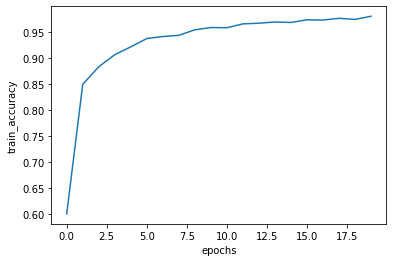

In [314]:
plt.plot(history.history['accuracy'])
plt.ylabel('train_accuracy')
plt.xlabel('epochs')
plt.show()

In [315]:
predictions = deep_learning.predict(test_df)

875/875 [==============================] - 1s 1ms/step


In [316]:
predictions # prediction array

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [317]:
predictions = pd.DataFrame(predictions)
predictions.index.name = 'ImageId'
predictions['Label'] = pd.get_dummies(predictions).idxmax(1)

In [318]:
predictions # prediction matrix

,0,1,2,3,4,5,6,7,8,9,Label
ImageId,,,,,,,,,,,
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2
1,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,9
3,0.0,0.0,0.0,0.0,0.999996,0.0,0.0,0.0,0.0,0.000004,4
4,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,9
27996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,7
27997,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,3


In [319]:
submission = predictions.loc[:, 'Label'] # getting required columns
submission

ImageId
0        2
1        0
2        9
3        4
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [320]:
submission.index += 1 # shifting index to start with 1
submission.to_csv('submission.csv')